In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the dataset
url = '/Users/rajvansh3001icloud.com/Downloads/Churn.csv'
data = pd.read_csv(url)


In [3]:
# Data Preprocessing
# Handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [4]:
# Convert categorical variables
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])



In [5]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])



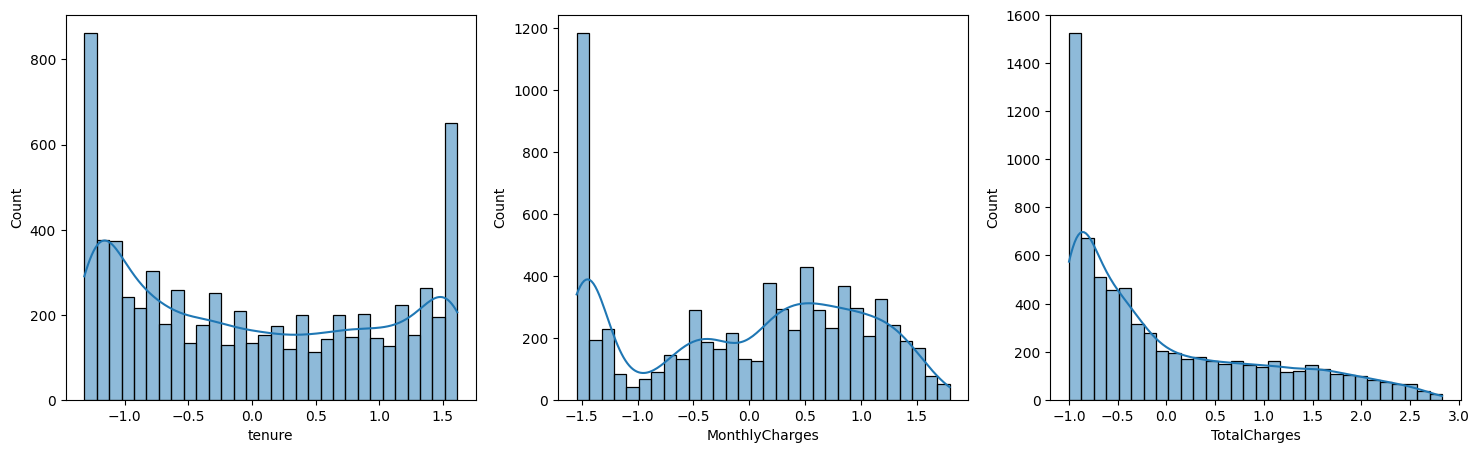

In [6]:
# Exploratory Data Analysis (EDA)
# Distribution of variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['tenure'], bins=30, kde=True, ax=ax[0])
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=ax[1])
sns.histplot(data['TotalCharges'], bins=30, kde=True, ax=ax[2])
plt.show()




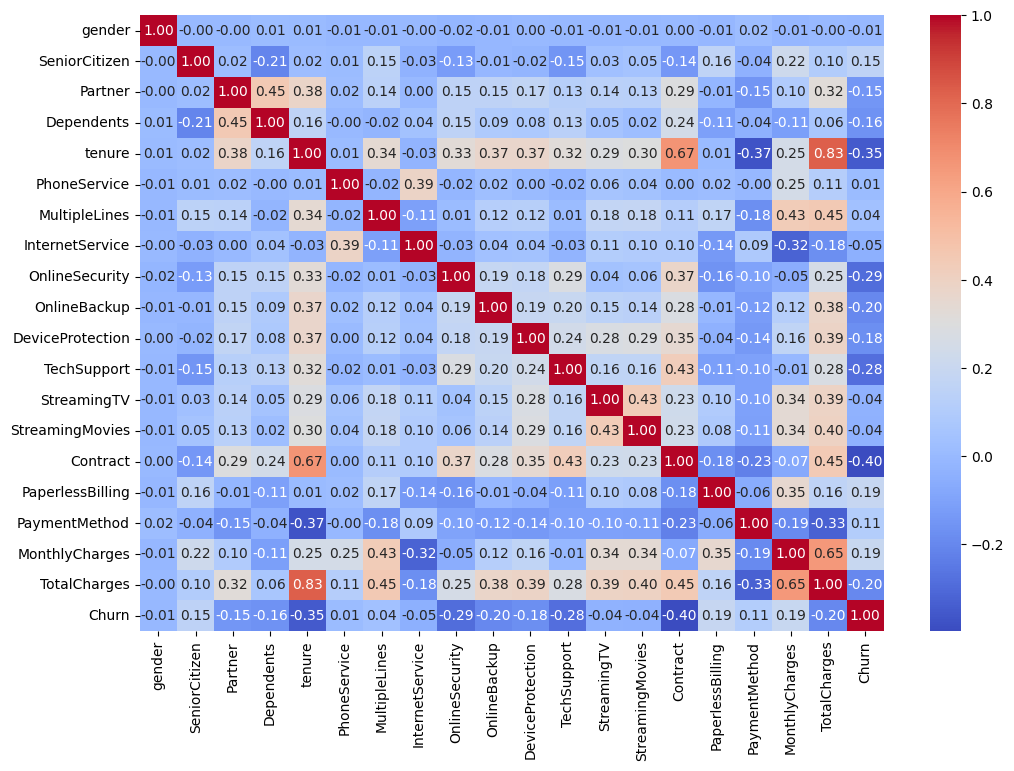

In [7]:
# Correlation analysis
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [8]:
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [9]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [10]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



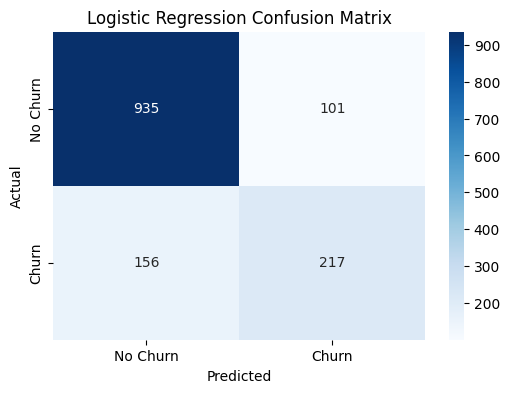

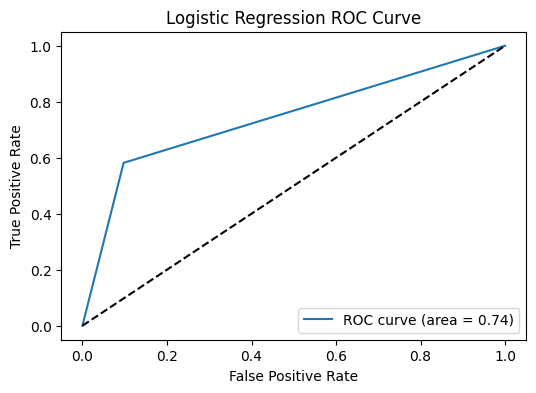

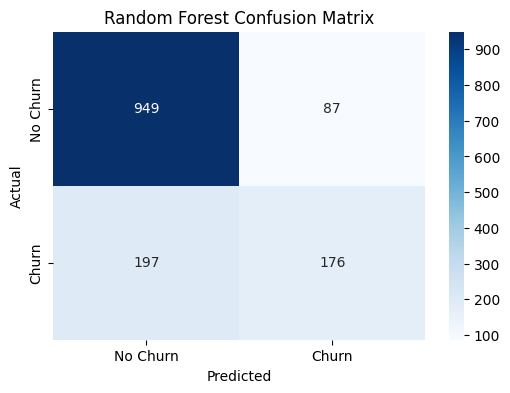

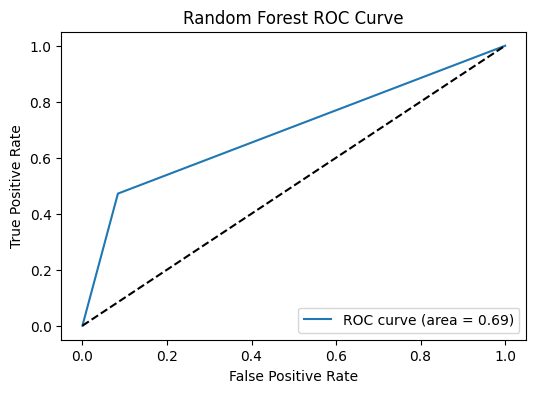

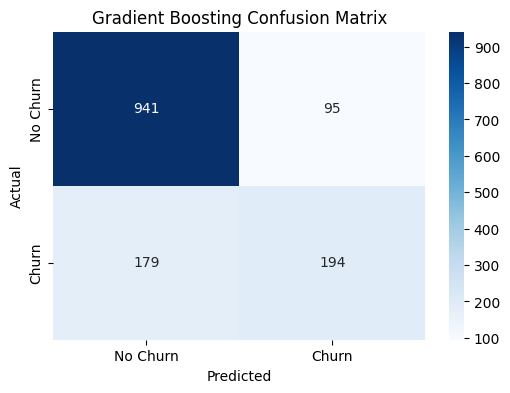

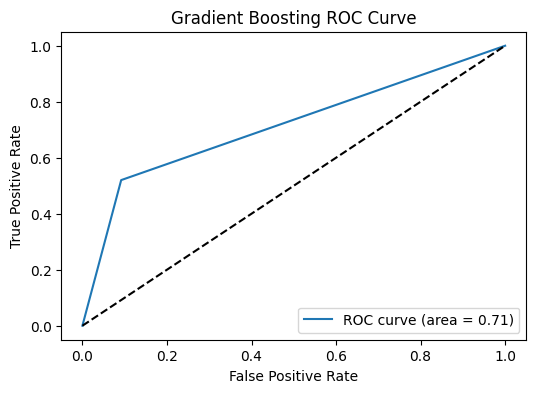

In [11]:
# Model Evaluation
# Confusion Matrix and ROC-AUC
def plot_evaluation(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_pred) 
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_evaluation(y_test, y_pred_log, 'Logistic Regression')
plot_evaluation(y_test, y_pred_rf, 'Random Forest')
plot_evaluation(y_test, y_pred_gb, 'Gradient Boosting')



In [12]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_best))



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Tuned Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



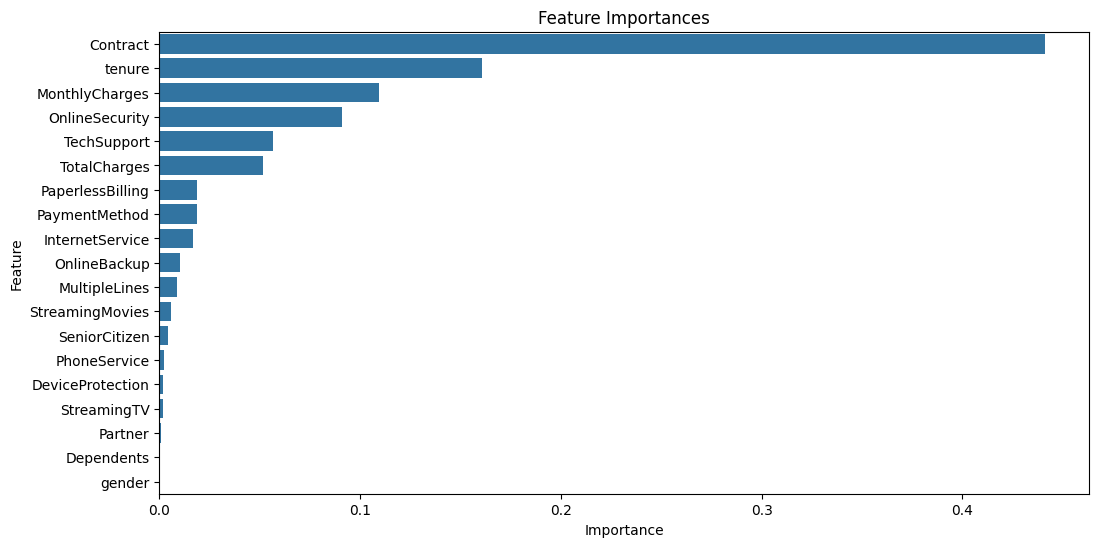

In [13]:
# Interpret feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()